In [3]:
# data manipulation and computiational tool
import pandas as pd
import numpy as np
# data visualization libraries
import seaborn as sns
from matplotlib import pyplot as plt
# model development, cross validation and accuracy test
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
# loading titanic datasets
df = pd.read_csv('titanic_data.csv')

In [5]:
# return the first five row of each column
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# return the shape the dataframe
df.shape

(891, 12)

In [7]:
# return the dtypes of each column
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# returns columns with missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Analysis.
Using Visualization tools to uncover insight

<AxesSubplot:xlabel='Age', ylabel='Count'>

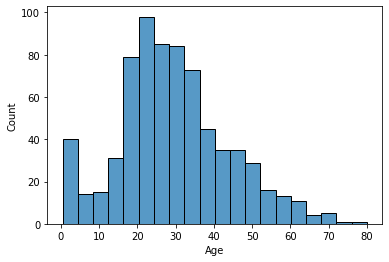

In [9]:
# plotting Age range of passengers in titanic ship
sns.histplot(df, x='Age')

<AxesSubplot:xlabel='Survived', ylabel='count'>

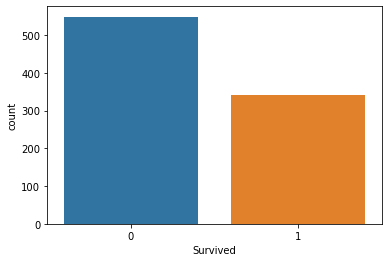

In [10]:
# using the countplot to count number of survival, where 0 implies death and 1 implies survival
sns.countplot(x='Survived', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

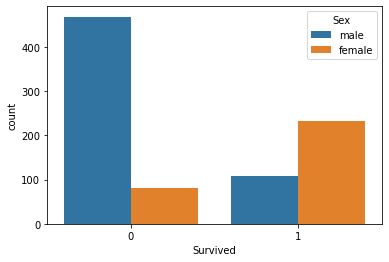

In [11]:
# counting number of survival by gender
sns.countplot(x='Survived', hue='Sex', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

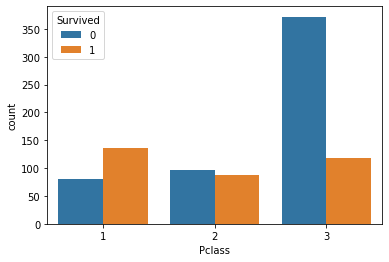

In [12]:
# plotting pclass by survived, where the ship consist of three classes
sns.countplot(x='Pclass', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

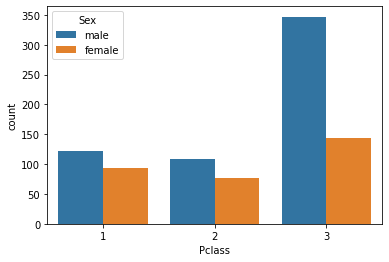

In [13]:
# plotting pclass by gender
sns.countplot(x='Pclass', hue='Sex', data=df)

# Data Wrangling
Cleaning and preparing data for model development

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# dropping in relevant columns
df.drop(columns=['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [17]:
# dropping NaN values in the dataframe
(df
 .dropna(inplace=True)
)

In [18]:
# performing a one hot encoding
# converting some of the categorical colums into numeric, using pandas dummies
sex = pd.get_dummies(df['Sex'], drop_first=True)
emb = pd.get_dummies(df['Embarked'], drop_first=True)
pc = pd.get_dummies(df['Pclass'], drop_first=True)

In [19]:
# concating 
df = pd.concat([df, sex, emb, pc], axis=1)

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,Q,S,2,3
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0,1,0,0
6,0,1,male,54.0,0,0,51.8625,E46,S,1,0,1,0,0
10,1,3,female,4.0,1,1,16.7000,G6,S,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,C103,S,0,0,1,0,0


In [21]:
# dropping columns
df.drop(columns=['Sex','Cabin','Embarked','Pclass'], inplace=True)

In [22]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0
6,0,54.0,0,0,51.8625,1,0,1,0,0
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,1,0,0


# Model Development

In [23]:
# dropping survived column which contain the label
X = df.drop('Survived', axis=1)
# assigning the survived to y 
y = df['Survived']

In [24]:
# splitting our datasets into training set and testing set
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size=0.35, random_state=40)

In [25]:
# split data in train/test sets. Split dataset into k consecutive folds
kfld = KFold(n_splits=6, shuffle=True)

In [26]:
# using support vector classifier
model = SVC()

In [ ]:
# cross validation
# specifying parameter values for GridSearchCV
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'), 
         'gamma' : ('scale', 'auto'),
        'C' : list(range(1, 5))}

# Also known as Parameter Turning
# Exhaustive search over specified parameter values for an estimator
grid_sc = GridSearchCV(model, param, cv=kfld, scoring='roc_auc')
# fitting x_train and y_train 
grid_sc.fit(x_train, y_train)